In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = "data1/Spotify-2000.csv"

df = pd.read_csv(file_path)
print(df.head(5))

   Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68          

In [ ]:
import pandas as pd

file_path = "data1/Spotify-2000.csv"

def clean_and_extract_data(file_path, output_path):
   
    # Charger les données
    try:
        data = pd.read_csv(file_path)
    except Exception as e:
        print(f"Erreur lors du chargement du fichier : {e}")
        return None

    # Vérifier les colonnes disponibles
    print("Colonnes disponibles :")
    print(data.columns)

    # Renommer les colonnes si nécessaire pour correspondre aux informations souhaitées
    # Par exemple : 'song_name', 'artist_name', 'genre', 'release_year', 'plays'
    column_mapping = {
        'Title': 'Titre de la chanson',
        'Artist': 'Nom de l\'artiste',
        'Top Genre': 'Genre musical',
        'Year': 'Année de sortie',
        'Popularity': 'Nombre d\'écoutes'
    }
    
    # Sélectionner uniquement les colonnes d'intérêt
    try:
        cleaned_data = data[list(column_mapping.keys())].rename(columns=column_mapping)
    except KeyError as e:
        print(f"Colonnes manquantes dans le fichier : {e}")
        return None

    # Supprimer les lignes contenant des valeurs manquantes
    cleaned_data = cleaned_data.dropna()

    # Sauvegarder les données nettoyées
    cleaned_data.to_csv(output_path, index=False)
    print(f"Données nettoyées et sauvegardées dans {output_path}")

    return cleaned_data

# Exemple d'utilisation
file_path = "data1/Spotify-2000.csv"  # Remplacez par le chemin réel de votre fichier
output_path = "data1/cleaned_spotify_data.csv"

cleaned_data = clean_and_extract_data(file_path, output_path)

if cleaned_data is not None:
    print("Aperçu des données nettoyées :")
    print(cleaned_data.head())


Colonnes disponibles :
Index(['Index', 'Title', 'Artist', 'Top Genre', 'Year',
       'Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
       'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
       'Speechiness', 'Popularity'],
      dtype='object')
Données nettoyées et sauvegardées dans data1/cleaned_spotify_data.csv
Aperçu des données nettoyées :
      Titre de la chanson   Nom de l'artiste        Genre musical  \
0                 Sunrise        Norah Jones      adult standards   
1             Black Night        Deep Purple           album rock   
2          Clint Eastwood           Gorillaz  alternative hip hop   
3           The Pretender       Foo Fighters    alternative metal   
4  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Année de sortie  Nombre d'écoutes  
0             2004                71  
1             2000                39  
2             2001                69  
3             2007                76  
4       

In [15]:
df = pd.read_csv(file_path)
file_path = "data1/cleaned_spotify_data.csv"
print(df.describe())

       Année de sortie  Nombre d'écoutes
count      1994.000000        1994.00000
mean       1992.992979          59.52658
std          16.116048          14.35160
min        1956.000000          11.00000
25%        1979.000000          49.25000
50%        1993.000000          62.00000
75%        2007.000000          71.00000
max        2019.000000         100.00000


In [18]:
genre_counts = df['Genre musical'].value_counts()
print(genre_counts)

Genre musical
album rock                 413
adult standards            123
dutch pop                   88
alternative rock            86
dance pop                   83
                          ... 
german alternative rock      1
classic italian pop          1
pop punk                     1
motown                       1
bebop                        1
Name: count, Length: 149, dtype: int64


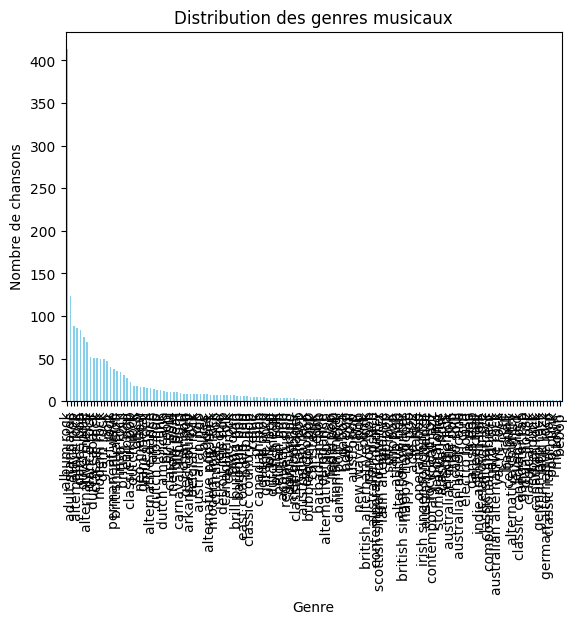

In [19]:
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution des genres musicaux')
plt.xlabel('Genre')
plt.ylabel('Nombre de chansons')
plt.show()